# SIR models


https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/


There is a modified model called SEIR that has been  used to study the COVID epidemic.

https://www.math.u-bordeaux.fr/~pmagal100p/papers/MW-JMB-2018.pdf
    

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

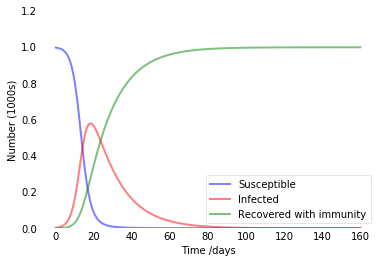

In [2]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 3, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.5, 1./14
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, 
             args=(N, beta, gamma))

S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure()
ax = fig.add_subplot(111, 
                     #axis_bgcolor='#dddddd', 
                     axisbelow=True)

ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

$\nu = \nu_1 + \nu_2$

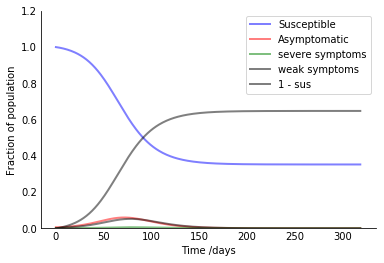

In [53]:
nu = 1/7
tau, nu1,nu2, eta = .12, 0.1*nu, .9*nu, 1./7

# The SIRU model differential equations.
def deriv(y, t, N, tau, nu1,nu2, eta):
    S, I, R, U = y
    dSdt = -tau * S * (I + U) / N
    dIdt = tau * S * (I + U) / N - (nu1 + nu2) * I
    dRdt = nu1 * I - eta * R
    dUdt = nu2 * I - eta * U
    return dSdt, dIdt, dRdt, dUdt

# Initial conditions vector
S0, I0 = N, 6
R0 = U0 = 0
y0 = S0, I0, R0, U0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0,  
             np.linspace(0, 320,320), 
             args=(N, tau, nu1,nu2, eta))

S, I, R, U = ret.T/N

fig = plt.figure()
ax = fig.add_subplot(111, 
                     #axis_bgcolor='#dddddd', 
                     axisbelow=True)

ax.plot( S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot( I, 'r', alpha=0.5, lw=2, label='Asymptomatic')
ax.plot( R, 'g', alpha=0.5, lw=2, label='severe symptoms')
ax.plot( U, 'k', alpha=0.5, lw=2, label='weak symptoms')
ax.plot(1 - S, 'k', alpha=0.5, lw=2, label='1 - sus')

ax.set_xlabel('Time /days')
ax.set_ylabel('Fraction of population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')

legend = ax.legend()
#legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right'):
    ax.spines[spine].set_visible(False)
plt.show()

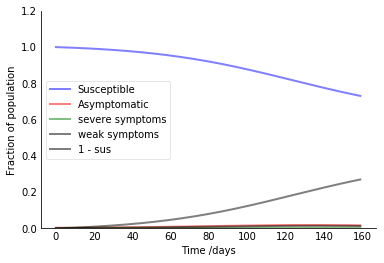

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, 
                     #axis_bgcolor='#dddddd', 
                     axisbelow=True)

ax.plot( S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot( I, 'r', alpha=0.5, lw=2, label='Asymptomatic')
ax.plot( R, 'g', alpha=0.5, lw=2, label='severe symptoms')
ax.plot( U, 'k', alpha=0.5, lw=2, label='weak symptoms')
ax.plot(1 - S, 'k', alpha=0.5, lw=2, label='1 - sus')

ax.set_xlabel('Time /days')
ax.set_ylabel('Fraction of population')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right'):
    ax.spines[spine].set_visible(False)
plt.show()

In [55]:
max(R)*66*10**6

382120.30602283054

999.0413071700651